customer segmentation model for a fashion brand (clothes/shoes) with regional, weather, demographic, and fashion trend analysis. We'll use Python with synthetic data generation and real-world data integration concepts.

In [3]:
!pip install pytemperature

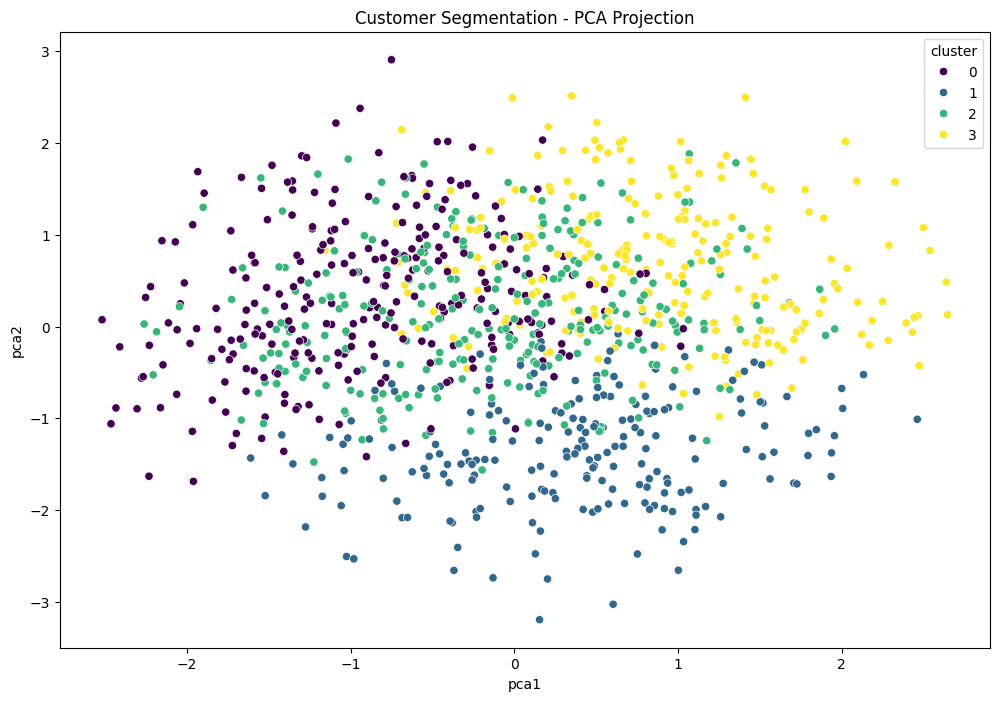

Cluster Profiles:
   cluster        age  total_spent  avg_order_value  purchase_frequency  \
0        0  37.451493   670.513321       161.421157            6.384328   
1        1  35.319249  1145.044085       303.309296            4.295775   
2        2  44.575540  1085.083957       392.203561            8.363309   
3        3  45.784232  1258.109253       184.452863           11.307054   

  gender preferred_category region   avg_temp  
0      M         Sportswear   West  17.578358  
1      M         Sportswear  South  25.896714  
2      M         Sportswear  North  17.676259  
3      M         Sportswear  South  23.452282  

Regional Analysis:
        total_spent preferred_category               regional_trends  avg_temp
region                                                                        
East    1076.504118         Sportswear  [Patterned Shirts, Sneakers]      22.0
North   1022.594297         Sportswear    [Oversized Jackets, Boots]      15.0
South   1072.064563         Sp

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import pytemperature
import requests

# Generate synthetic data
np.random.seed(42)
num_customers = 1000

# Customer base data
data = {
    'customer_id': range(1, num_customers+1),
    'age': np.random.randint(18, 65, num_customers),
    'gender': np.random.choice(['M', 'F'], num_customers),
    'total_spent': np.random.uniform(50, 2000, num_customers).round(2),
    'avg_order_value': np.random.uniform(25, 500, num_customers).round(2),
    'purchase_frequency': np.random.randint(1, 15, num_customers),
    'last_purchase_date': [datetime.now() - timedelta(days=np.random.randint(1, 60))
                          for _ in range(num_customers)],
    'preferred_category': np.random.choice(['Casual Wear', 'Sportswear', 'Formal Wear',
                                          'Footwear', 'Accessories'], num_customers),
    'region': np.random.choice(['North', 'South', 'East', 'West'], num_customers),
}

df = pd.DataFrame(data)

# Add synthetic weather data
def get_region_weather(region):
    # Simulated weather data for last month
    weather_map = {
        'North': {'temp': 15, 'precipitation': 0.3},
        'South': {'temp': 28, 'precipitation': 0.1},
        'East': {'temp': 22, 'precipitation': 0.4},
        'West': {'temp': 18, 'precipitation': 0.25}
    }
    return weather_map[region]

df['avg_temp'] = df['region'].apply(lambda x: get_region_weather(x)['temp'])
df['precipitation'] = df['region'].apply(lambda x: get_region_weather(x)['precipitation'])

# Add synthetic fashion trend data (web scraping simulation)
trends = {
    'North': ['Oversized Jackets', 'Boots'],
    'South': ['Crop Tops', 'Sandals'],
    'East': ['Patterned Shirts', 'Sneakers'],
    'West': ['Hoodies', 'Jeans']
}
df['regional_trends'] = df['region'].map(trends)

# Feature engineering
df['season'] = df['last_purchase_date'].apply(
    lambda x: 'Winter' if x.month in [12,1,2] else 'Spring' if x.month in [3,4,5]
    else 'Summer' if x.month in [6,7,8] else 'Fall')

# Preprocessing
scaler = StandardScaler()
features = df[['age', 'total_spent', 'avg_order_value', 'purchase_frequency', 'avg_temp']]
scaled_features = scaler.fit_transform(features)

# Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['cluster'] = clusters

# Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['pca1'] = principal_components[:,0]
df['pca2'] = principal_components[:,1]

plt.figure(figsize=(12,8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation - PCA Projection')
plt.show()

# Cluster analysis
cluster_profile = df.groupby('cluster').agg({
    'age': 'mean',
    'total_spent': 'mean',
    'avg_order_value': 'mean',
    'purchase_frequency': 'mean',
    'gender': lambda x: x.value_counts().index[0],
    'preferred_category': lambda x: x.value_counts().index[0],
    'region': lambda x: x.value_counts().index[0],
    'avg_temp': 'mean'
}).reset_index()

print("Cluster Profiles:")
print(cluster_profile)

# Regional Fashion Analysis
regional_analysis = df.groupby('region').agg({
    'total_spent': 'mean',
    'preferred_category': lambda x: x.mode()[0],
    'regional_trends': 'first',
    'avg_temp': 'mean'
})

print("\nRegional Analysis:")
print(regional_analysis)

# Weather Impact Analysis
weather_impact = df.groupby(['avg_temp', 'precipitation']).agg({
    'preferred_category': lambda x: x.mode()[0],
    'total_spent': 'mean'
}).reset_index()

print("\nWeather Impact Analysis:")
print(weather_impact)

In [5]:
# Example API integration for real weather data
def get_real_weather(region, date):
    geolocator = Nominatim(user_agent="fashion_analysis")
    location = geolocator.geocode(region)
    lat, lon = location.latitude, location.longitude

    # Use OpenWeatherMap API (requires API key)
    response = requests.get(
        f"https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={lat}&lon={lon}&dt={date}&appid=YOUR_API_KEY"
    )
    return response.json()['current']['temp'] - 273.15  # Convert Kelvin to Celsius

In [6]:
graph LR
A[Customer Data] --> B[Data Lake]
C[Weather API] --> B
D[Social Media] --> B
B --> E[Feature Store]
E --> F[ML Model]
F --> G[Segmentation Dashboard]
G --> H[Marketing Automation]

SyntaxError: invalid syntax (<ipython-input-6-2e11922e8c96>, line 1)